# To reproduce a run and investigate seasonal transition signature

In [205]:
# Import libraries
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

sys.path.append("../libs/cfe_py")
from bmi_cfe import BMI_CFE

sys.path.append("../libs/SMSig")
from sig_seasontrans import SMSig

# Specify current directory create output directory if it does not exist
os.getcwd()

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\5_post_analysis'

# Configuration

In [206]:
site = "Coweeta"
case = rf"{site}-2024-03-19"


In [207]:
data_directory = rf"..\data\{site}"
config_temp_path = os.path.join(data_directory, "temporary_parameter_files_for_GLUE", "config_cfe_0.json")
prior_params_path = rf"..\3_GLUE_prerun\results\{case}\prior_parameters.csv"
evaluation_metrics_path = rf"..\3_GLUE_prerun\results\{case}\evaluation_metrics.csv"
out_path = rf".\results\{case}"
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Load parameters for a run

In [208]:
eval_metrics = pd.read_csv(evaluation_metrics_path)
# eval_metrics[(eval_metrics['KGE on Soil']>0.71) & (eval_metrics['SeasonTrans of Soil dry2wet_end']>50)]
# 93, 32, 71
eval_metrics[(eval_metrics['SeasonTrans of Soil dry2wet_end']<30)]
# eval_metrics[(eval_metrics['KGE on Soil']>0.5)]
# run_id=190
# eval_metrics[(eval_metrics['KGE on Soil']>0.7) & (eval_metrics['SeasonTrans of Soil dry2wet_end']>50)]
# run_id=113, 9817

,run_id,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw
32,32,0.658877,-15.336404,0.649017,-0.069616,6.554098,0.077606,30.928083,67.007250,"[23.88579917885363, -13.400986194144934, 9.177...","[-5.6796498484909534, 6.337931379210204, -0.89...","[-56.6349140945822, -33.32808419736102, -2.821...","[-134.15343061927706, -44.868454828392714, -21..."
40,40,-0.981281,-16.943890,-0.247039,-0.143286,10.755970,28.105247,20.792025,69.556578,"[24.88579247519374, -13.482554202899337, 20.86...","[-8.985323748551309, 7.0000127837993205, -82.3...","[-45.778890835121274, -23.192724586930126, 6.5...","[-128.41411105543375, -61.25569980125874, -18...."
82,82,-0.250480,-13.671080,0.037245,-0.023492,11.756101,29.952906,16.111381,67.258903,"[23.885797541588545, -11.184270605444908, 22.5...","[-10.311653224285692, 7.439102712087333, -86.9...","[-34.23750134091824, -24.443341514561325, 10.3...","[-127.95933330524713, -56.817454722709954, -16..."
93,93,0.701360,-15.835435,0.781669,-0.092094,7.538766,9.385894,28.126112,67.188885,"[23.885795102920383, -13.450585995800793, 12.1...","[-6.1912106103263795, 6.494356286711991, -28.4...","[-49.636567764915526, -33.12463135179132, -1.6...","[-133.84540311107412, -46.7213300014846, -20.9..."


In [167]:
config_all_runs = pd.read_csv(prior_params_path)
config_all_runs.head()

,run_id,bb,satdk,slop,smcmax,wltsmc,max_gw_storage
0,0,2.347518,0.010247,0.072213,0.853131,2.027306e-07,0.201969
1,1,5.303186,0.011880,0.014824,0.997685,1.914048e-07,0.196871
2,2,2.515859,0.013939,0.020967,0.895260,1.925603e-07,0.187293
3,3,3.839143,0.009684,0.094175,0.941837,1.630760e-07,0.190257
4,4,5.534313,0.016305,0.088767,0.970199,2.248495e-07,0.185468


In [209]:

run_id = 32
config_target_runs = config_all_runs[config_all_runs["run_id"]==run_id]
print(config_target_runs)

    run_id        bb     satdk      slop    smcmax        wltsmc  \
32      32  2.418732  0.003095  0.023229  0.934252  2.206052e-07   

    max_gw_storage  
32        0.204121  


In [210]:
with open(config_temp_path, 'r') as outfile:
    config_temp = json.load(outfile)

In [211]:
for key, value in config_target_runs.items():
    if key == "run_id":
        None
    elif key in ['bb', 'satdk', 'slop', 'satpsi', 'smcmax', 'wltsmc', 'D']:
        config_temp["soil_params"][key] = value.values[0]
    else:
        config_temp[key] = value.values[0]
config_temp

{'forcing_file': 'G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv',
 'catchment_area_km2': 0.121,
 'soil_params': {'bb': 2.41873210714593,
  'satdk': 0.0030950305798816,
  'slop': 0.0232294277047776,
  'satpsi': 0.141,
  'smcmax': 0.934251640445114,
  'wltsmc': 2.2060521669456778e-07,
  'D': 0.6},
 'max_gw_storage': 0.2041209169832086,
 'Cgw': 0.001,
 'expon': 3,
 'K_lf': 0.9784460486586726,
 'K_nash': 1e-05,
 'num_nash_storage': 2,
 'giuh_ordinates': [0.5, 0.5],
 'trigger_z_fact': 0.570054772877,
 'alpha_fc': 0.33,
 'refkdt': 3,
 'stand_alone': 1,
 'unit_test': 1,
 'time_step_size': 86400,
 'compare_results_file': 'G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv'}

In [212]:
temporary_config_path = "temporary_config_reproducing_run"
if not os.path.exists(temporary_config_path):
    os.makedirs(temporary_config_path)

In [213]:
temporary_config_file = os.path.join(temporary_config_path, f"config_cfe_{run_id}.json")
with open(temporary_config_file, 'w') as out_file:
    json.dump(config_temp, out_file)

# Run CFE

GW & SM converged <1% after warm-up iteration 1; diff_gw: 0.0000000; diff_sm: 0.0000000


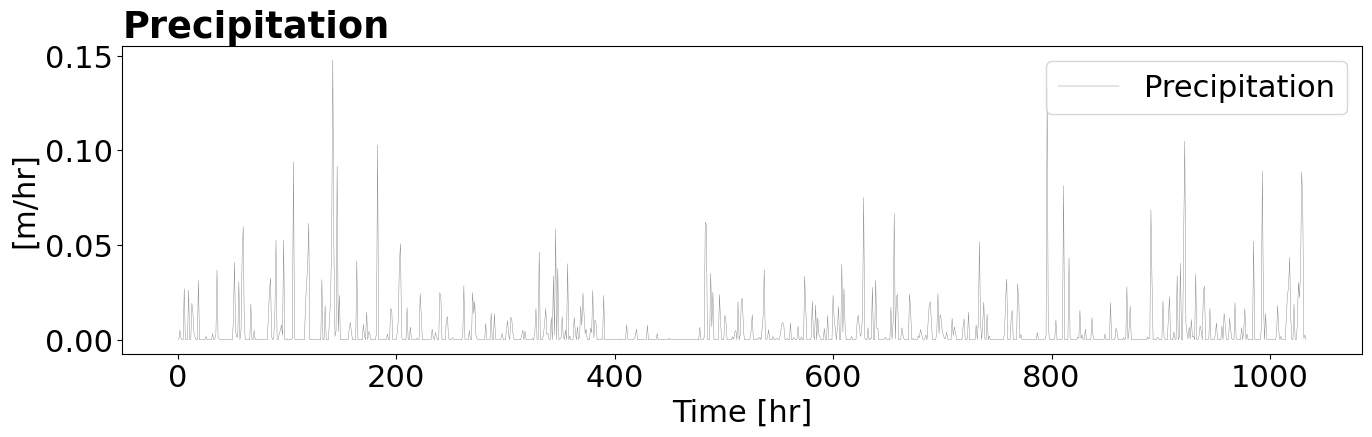

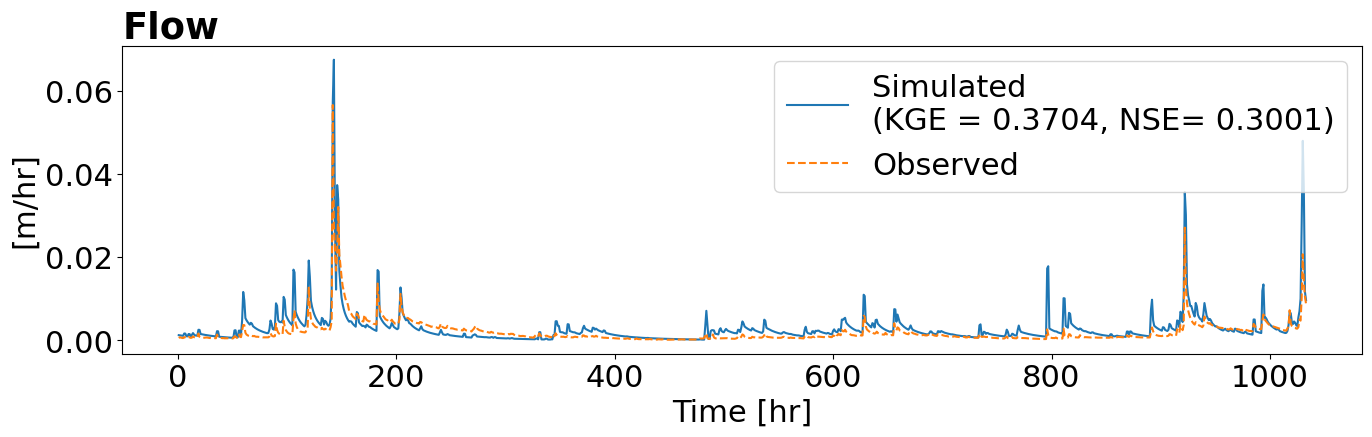

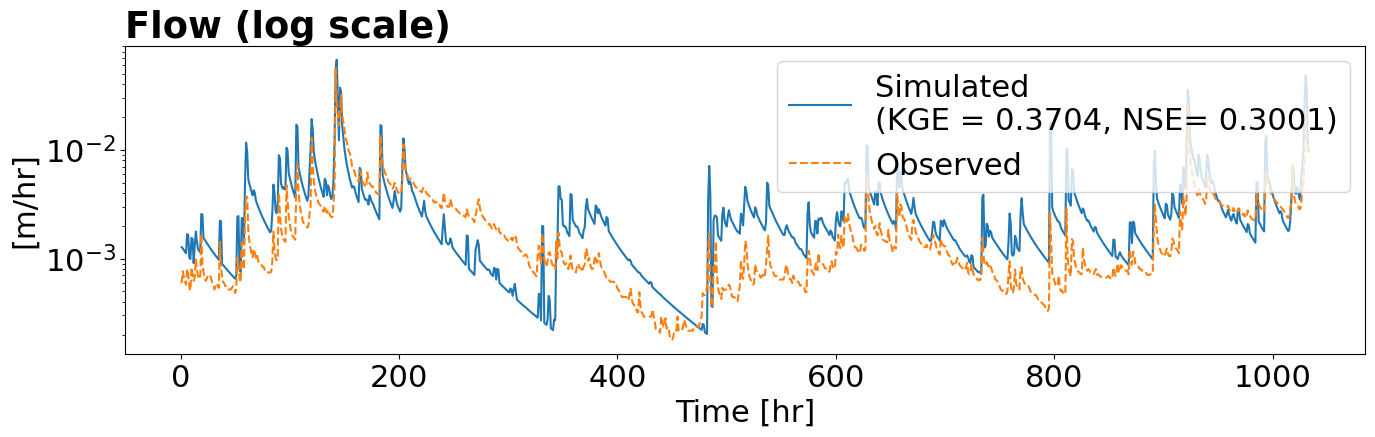

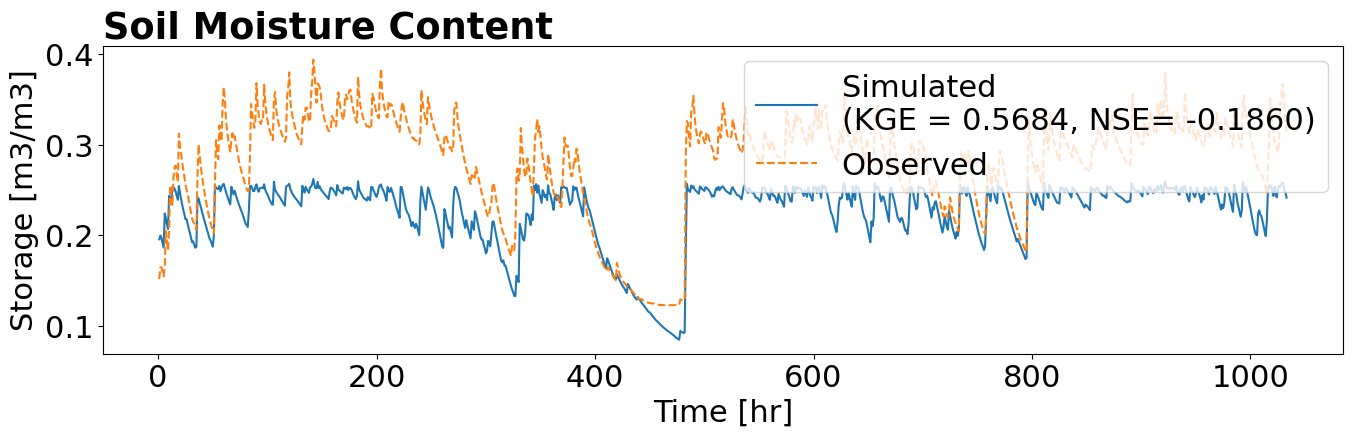

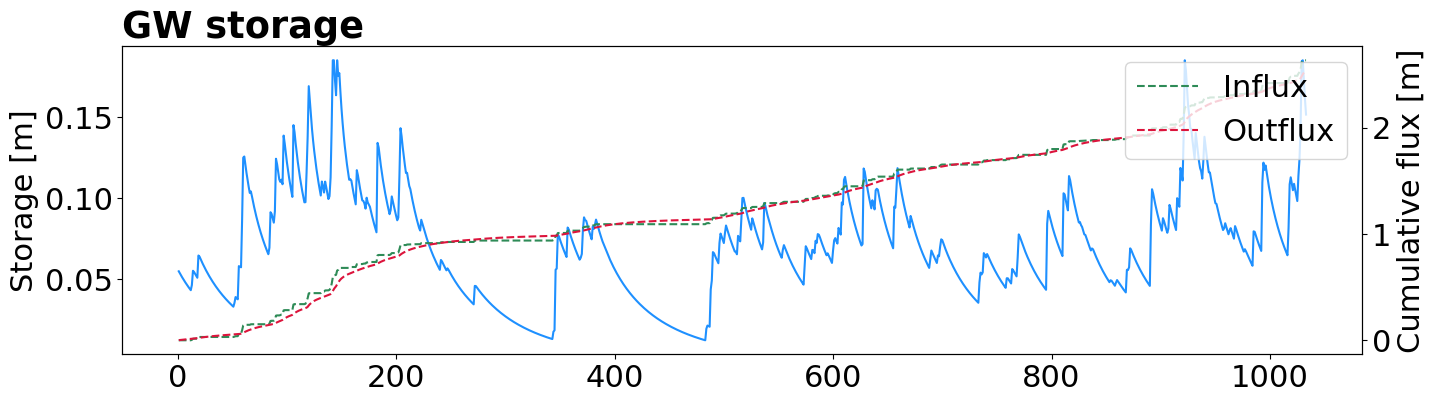

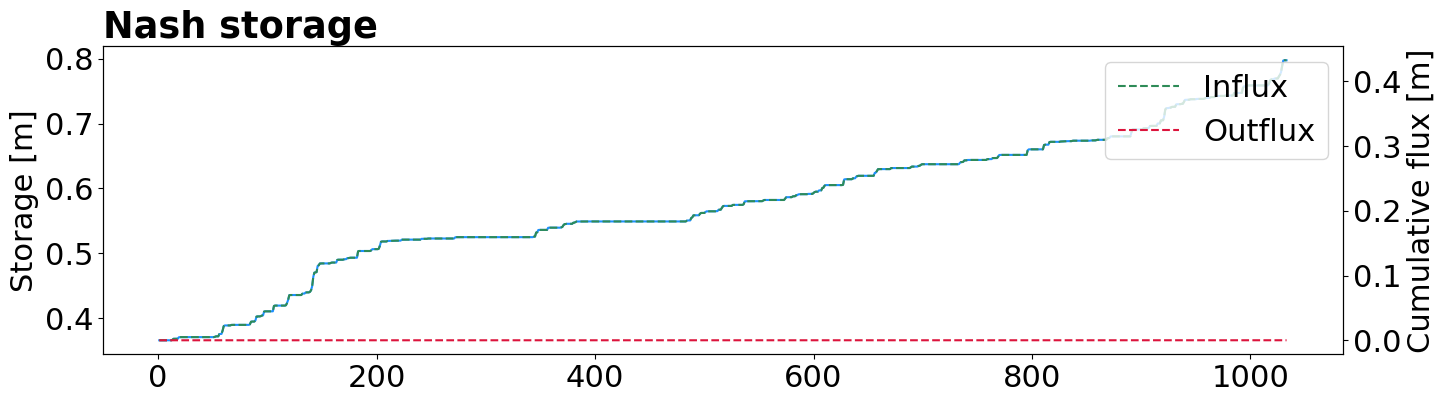

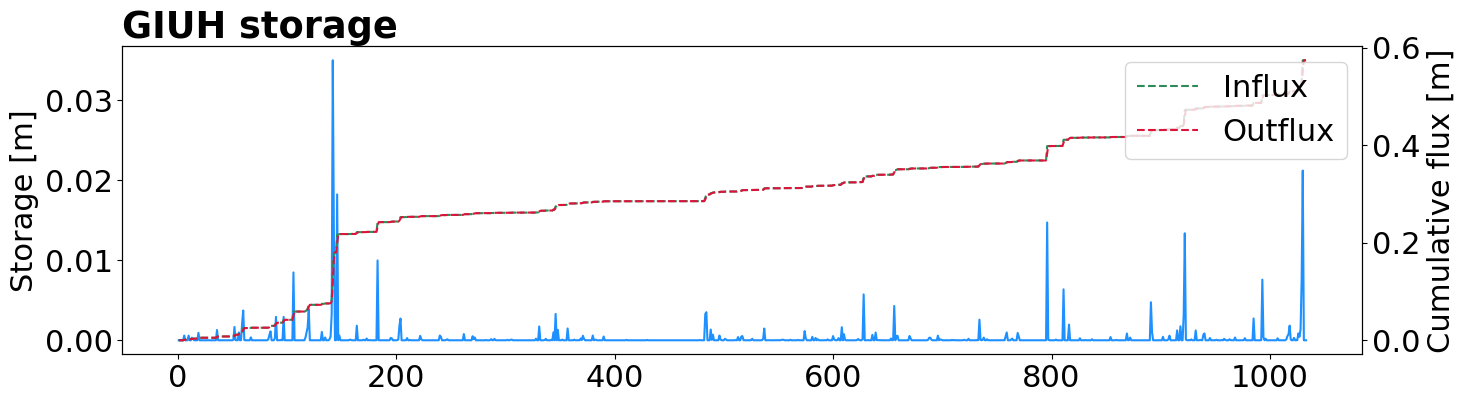

(      Soil Moisture Content
 0                  0.153545
 1                  0.151452
 2                  0.164292
 3                  0.164678
 4                  0.159843
 ...                     ...
 1030               0.366092
 1031               0.339694
 1032               0.325503
 1033               0.314286
 1034               0.304777
 
 [1035 rows x 1 columns],
       Soil Moisture Content
 0                  0.201743
 1                  0.195474
 2                  0.199551
 3                  0.196930
 4                  0.191632
 ...                     ...
 1030               0.257472
 1031               0.249513
 1032               0.247588
 1033               0.241487
 1034               0.236558
 
 [1035 rows x 1 columns])

In [214]:
# Run the CFE based on the config file
cfe_instance = BMI_CFE(temporary_config_file)
cfe_instance.initialize()
sim0 = cfe_instance.run_unit_test(plot=True,
    print_fluxes=True,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=400,
    warmup_iteration=10
    )
obs0 = cfe_instance.load_unit_test_data()

# Get the results
var_name = 'Soil Moisture Content'
sim = sim0[["Time", var_name]].copy()
sim["Time"] = pd.to_datetime(sim["Time"], format="%Y-%m-%d")  # Works specifically for CFE

# Get the comparison data
obs = obs0[["Time", var_name]].copy()
obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d") 
# if study_site == "Mahurangi":
#     obs["Time"] = pd.to_datetime(obs["Time"], format="%m/%d/%Y %H:%M")  # Works specifically for Mahurangi data
# elif study_site == "LittleWashita":
#     obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d %H:%M:%S")  # works for Little ashita
# # obs["Time"] = pd.to_datetime(obs["Time"], format="%d-%m-%Y %H:%M:%S")

# Merge observed and simulated timeseries
df = pd.merge_asof(sim, obs, on="Time")

sim_synced = pd.DataFrame()
obs_synced = pd.DataFrame()
sim_synced[var_name] = df[var_name + "_x"].copy()
obs_synced[var_name] = df[var_name + "_y"].copy()

obs_synced, sim_synced

# Run seasonal signature

In [215]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=df["Time"].to_numpy(),
    sm=obs_synced[var_name].to_numpy(),
    plot_results=False,
)

seasonal_cycle = pd.read_csv(os.path.join(data_directory, "seasonal_cycle.csv"), parse_dates=['valley', 'peak'])

_parameter_config = os.path.join(data_directory, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)

season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)

sig_sim = SMSig(
    t=df["Time"].to_numpy(),
    sm=sim_synced[var_name].to_numpy(),
    plot_results=False,
)
season_trans_sim = sig_sim.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)

# Get the deviations in seasonal transition dates between simulated and observed timeseries
diff = season_trans_sim - season_trans_obs
metric_value = abs(np.nanmean(diff, axis=0))
print(diff)
print(metric_value)



[[  25.88580064  -12.62161791  -10.44905102 -122.75448   ]
 [   4.549415      0.48160276  -32.86161287    7.78506825]
 [  25.66883235  -94.13028509   16.79865717  -13.99992193]
 [          nan           nan           nan           nan]]
[18.70134933 35.42343341  8.83733557 42.98977789]


# Load evaluation metrics

In [216]:
result_run = pd.read_csv(evaluation_metrics_path)
KGESM_for_the_run = result_run['KGE on Soil'][result_run["run_id"]==run_id].values[0]
print(KGESM_for_the_run)
result_run.head()

-0.0696164731097144


,run_id,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw
0,0,-0.450117,-10.626330,-0.008043,0.265728,21.641110,44.055878,1.727057,42.144159,"[25.885794770438224, 13.126603280194104, 25.91...","[-33.46238709939644, -4.497273376211524, -94.2...","[-0.9454003358259797, -32.72036108048633, 28.4...","[-121.13411163073033, 8.701557248365134, -13.9..."
1,1,-0.138853,-5.532551,0.123586,0.423323,21.894706,44.631875,2.733702,42.383347,"[26.885730459354818, 12.915120565332472, 25.88...","[-35.162994728889316, -4.545919108670205, -94....","[-1.9594283974729478, -33.462197569198906, 27....","[-121.5584415839985, 8.408320806920528, -13.99..."
2,2,-0.437253,0.372103,0.002512,0.661599,20.311184,42.898033,3.646095,42.635324,"[26.00401780428365, 9.021531247999519, 25.9080...","[-32.06750894756988, -2.4722988749854267, -94....","[-5.401564475148916, -33.128114802297205, 27.5...","[-121.91234224662185, 8.648805755656213, -14.6..."
3,3,-0.805195,-6.272681,-0.126331,0.397306,21.864786,44.684029,2.552753,42.165920,"[26.74886361276731, 12.928656568285078, 25.916...","[-35.199969354551286, -4.652244237717241, -94....","[-1.9392743115313351, -33.341028925497085, 27....","[-121.24953938601539, 8.75170241529122, -13.99..."
4,4,-0.454790,-11.268332,-0.006348,0.247908,21.970896,44.939693,2.018650,42.121990,"[26.885595187544823, 13.1190050477162, 25.9080...","[-36.08793813502416, -4.516620668582618, -94.2...","[-0.9386077988892794, -32.760320987552404, 27....","[-121.04858380090445, 8.682536076754332, -13.9..."


# Plot the results

<AxesSubplot:>

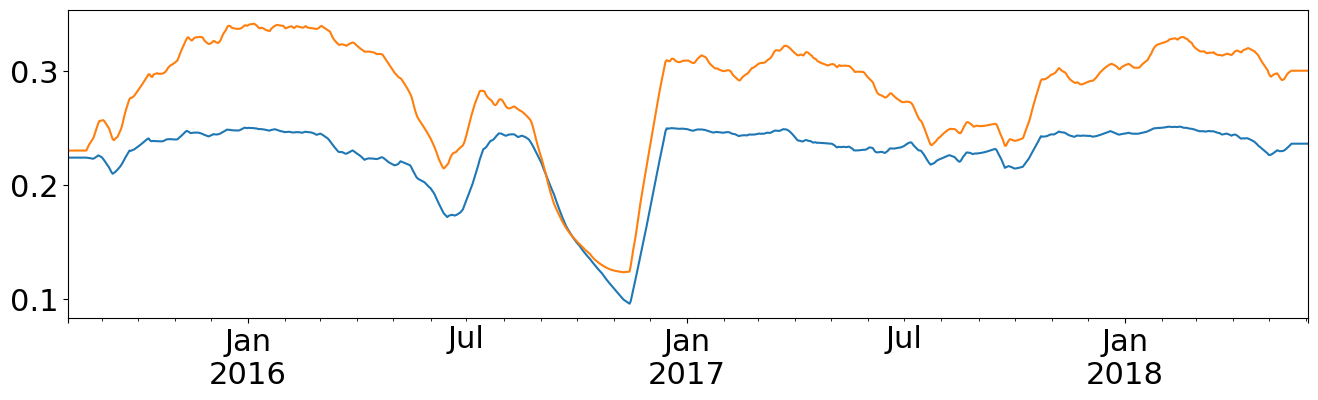

In [217]:
sig_sim.tt.plot()
sig_obs.tt.plot()

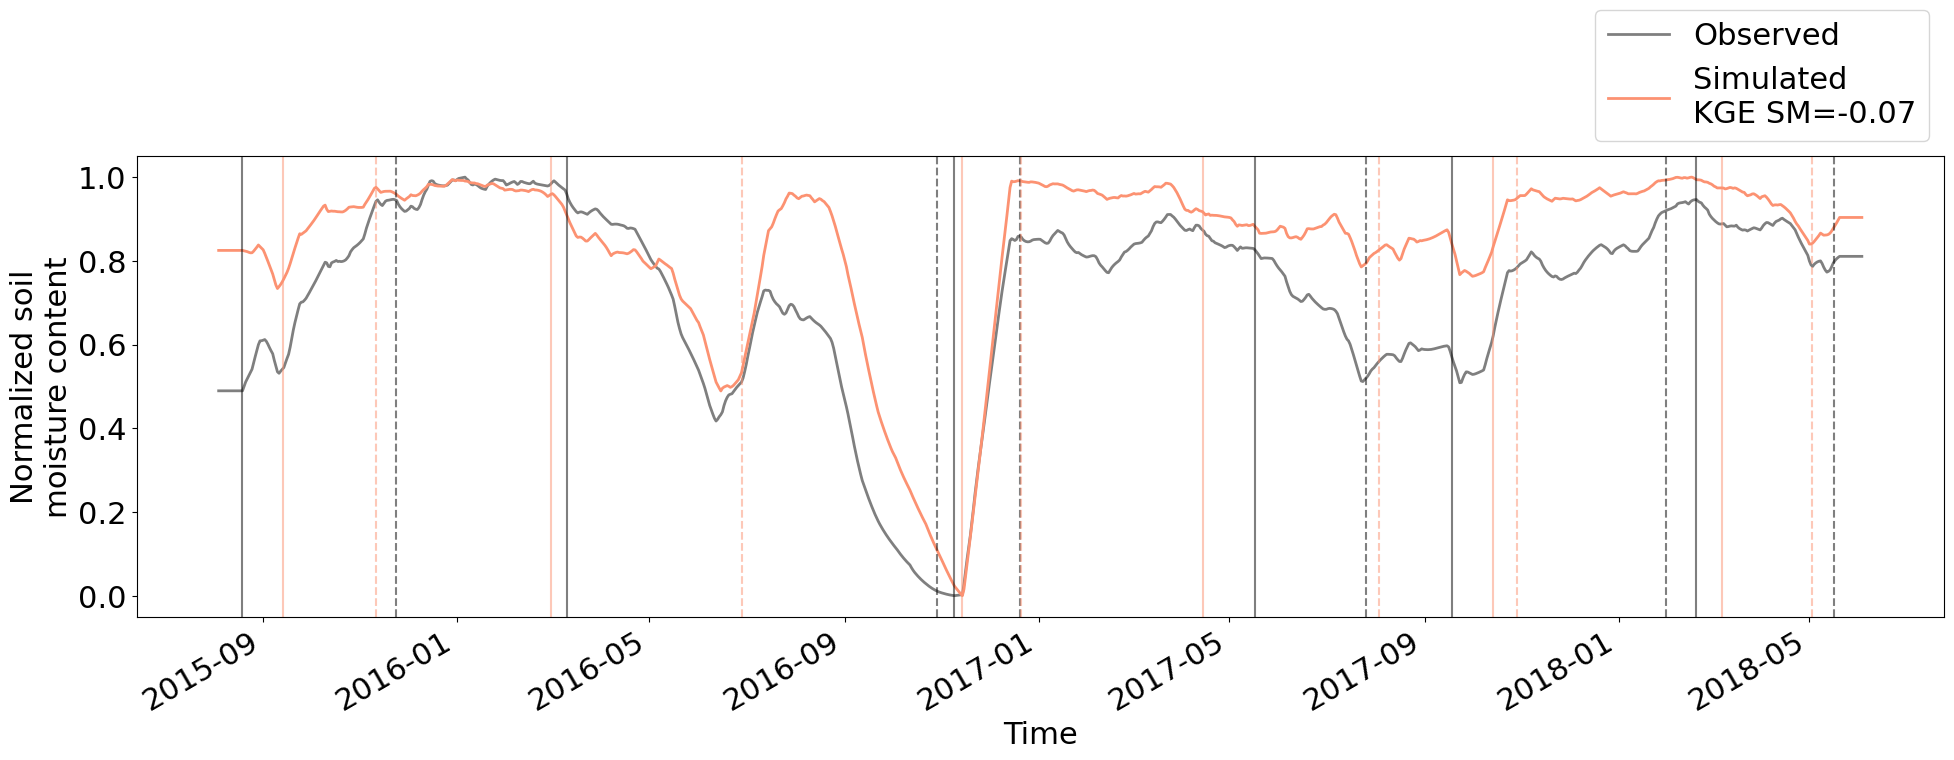

In [218]:
# Relative values of SM 
# Plot out the results
df_obs = obs_synced
df_sim = sim_synced
obs_label = 'Observed'
sim_label = f'Simulated\nKGE SM={KGESM_for_the_run:.2f}'
obs_color = 'k'
sim_color = '#fc9272'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.pdf'

f2 = plt.figure(figsize=(20, 8))
ax3 = f2.add_subplot()
plt.rc('font', size=22)
x_obs = sig_obs.tt.index
y_obs = (sig_obs.tt.values-min(sig_obs.tt.values))/(max(sig_obs.tt.values)-min(sig_obs.tt.values))
x_sim = sig_sim.tt.index
y_sim = (sig_sim.tt.values-min(sig_sim.tt.values))/(max(sig_sim.tt.values)-min(sig_sim.tt.values))
xlim_start = 0 #60
xlim_end = len(x_obs) #-60
ax3.plot(x_obs[xlim_start:xlim_end], y_obs[xlim_start:xlim_end], alpha=0.5, label=obs_label, color=obs_color, linewidth=2)
ax3.plot(x_sim[xlim_start:xlim_end], y_sim[xlim_start:xlim_end], alpha=1, label=sim_label, color=sim_color, linewidth=2)

import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

stard_dates_jd_sim = np.concatenate([season_trans_sim[:, 0], season_trans_sim[:, 2]])
start_dates_sim = [julian_to_datetime(jd) for jd in stard_dates_jd_sim]
end_dates_jd_sim = np.concatenate([season_trans_sim[:, 1], season_trans_sim[:, 3]])
end_dates_sim = [julian_to_datetime(jd) for jd in end_dates_jd_sim]

for i in range(len(start_dates_obs)):
    ax3.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax3.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
for i in range(len(start_dates_sim)):
    ax3.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_sim)):
    ax3.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax3.set_xlabel('Time')
from datetime import datetime
ax3.set_ylabel('Normalized soil\nmoisture content')
# ax3.set_title(title)
ax3.legend(loc='lower right', bbox_to_anchor=(1,1))
plt.tight_layout()
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, fn), dpi=600, bbox_inches='tight')

In [219]:
start_dates_obs

[datetime.datetime(2015, 8, 18, 14, 44, 27, 343985),
 datetime.datetime(2016, 11, 8, 22, 48, 50, 539995),
 datetime.datetime(2017, 9, 18, 7, 44, 28, 847188),
 nan,
 datetime.datetime(2016, 3, 10, 6, 39, 44, 2841),
 datetime.datetime(2017, 5, 17, 0, 1, 56, 115806),
 datetime.datetime(2018, 2, 18, 12, 0, 49, 551854),
 nan]

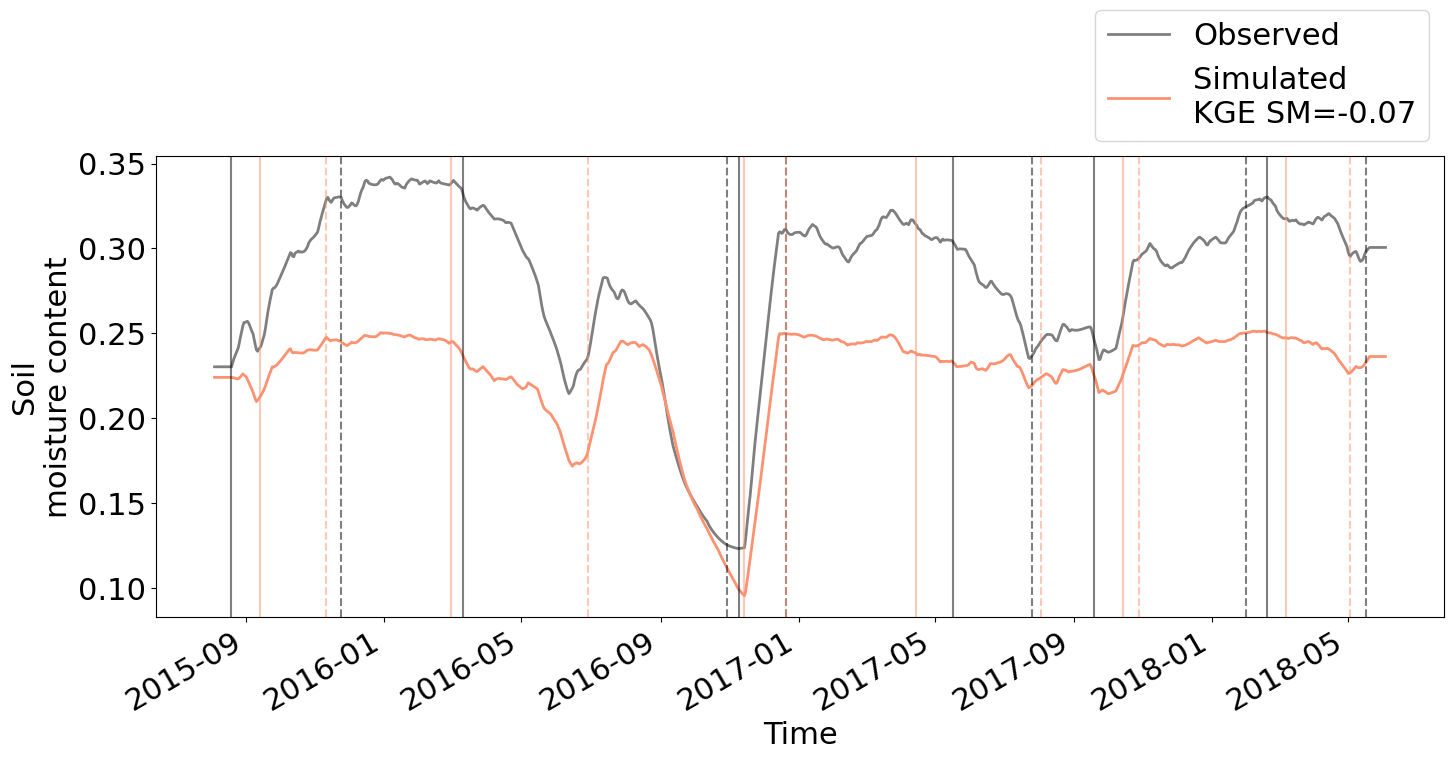

In [220]:
# Relative values of SM 
# Plot out the results
df_obs = obs_synced
df_sim = sim_synced
obs_label = 'Observed'
sim_label = f'Simulated\nKGE SM={KGESM_for_the_run:.2f}'
obs_color = 'k'
sim_color = '#fc9272'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.pdf'

f2 = plt.figure(figsize=(15, 8))
ax3 = f2.add_subplot()
plt.rc('font', size=22)
x_obs = sig_obs.tt.index
y_obs = sig_obs.tt.values
x_sim = sig_sim.tt.index
y_sim = sig_sim.tt.values
xlim_start = 0
xlim_end = len(x_obs)
ax3.plot(x_obs[xlim_start:xlim_end], y_obs[xlim_start:xlim_end], alpha=0.5, label=obs_label, color=obs_color, linewidth=2)
ax3.plot(x_sim[xlim_start:xlim_end], y_sim[xlim_start:xlim_end], alpha=1, label=sim_label, color=sim_color, linewidth=2)
for i in range(len(start_dates_obs)):
    ax3.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax3.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
for i in range(len(start_dates_sim)):
    ax3.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_sim)):
    ax3.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax3.set_xlabel('Time')
from datetime import datetime
ax3.set_ylabel('Soil\nmoisture content')
# ax3.set_ylim([0.30, 0.65])
# ax3.set_xlim(datetime(1998, 1,1), datetime(2001, 9, 30))
ax3.legend(loc='lower right', bbox_to_anchor=(1,1))
plt.tight_layout()
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, fn), dpi=600, bbox_inches='tight')

sig_sim.tt.to_csv(os.path.join(out_path, 'simulated.csv'))
sig_obs.tt.to_csv(os.path.join(out_path, 'observed.csv'))